# Data import, EDA, split, scaling

# Binary Classification on Breast Cancer Data

## Purpose of this project
The goal of this project is to analyze and compare between two machine learning algorithms, specifically for binary classification tasks on a non-linear dataset. Through this comparison, we aim to highlight the strengths, limitations, and applicability of each model. 

We begin by analyzing the dataset and implementing the Perceptrom Learning Algorithm, a foundational model in machine learning. The perceptron lays the groundwork for more complex models by using a linear decision boundary to classify data points. 

Next, we explore logistic regression, a probabilistic linear classifier that optimizes log loss and outputs calibrated class probabilities. Unlike perceptron's mistake-driven updates, logistic regression minimizes a convenx objective that makes training stable on non linearly separable data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import os
from pathlib import Path
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Import data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Christopher Hanryan\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


In [3]:
dataset = pd.read_csv("data/data.csv")
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)
print(dataset.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [4]:
print(dataset.tail())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius

In [5]:
print(dataset.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [6]:
print(dataset.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
dataset.drop('id',axis=1,inplace=True, errors="ignore")
dataset.drop('Unnamed: 32',axis=1,inplace=True, errors="ignore")
# size of the dataframe
len(dataset)

569

In [8]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

In [9]:
X = dataset.drop(columns=['diagnosis'])
y = dataset['diagnosis']
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
class_counts = y.value_counts()
class_counts

diagnosis
0    357
1    212
Name: count, dtype: int64

1 -> Malignant

0 -> Benign

It is a fairly imbalanced dataset. One way to solve this is to implement Synthetic minority oversampling technique. It is one of the most commonly used oversampling  methods to solve the imbalance problem.

([<matplotlib.axis.XTick at 0x19619d55ca0>,
 [Text(0, 0, 'Class 0'), Text(1, 0, 'Class 1')])

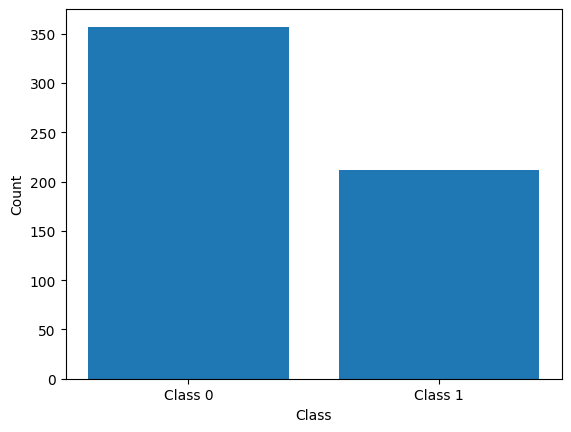

In [11]:
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index, ['Class 0', 'Class 1'])

## Understanding the Data
Each feature represents different measurement of tumors. The diagnosis columns represents the outcome whether the tumor is benign (0) or malignant (1).

<div>
<center>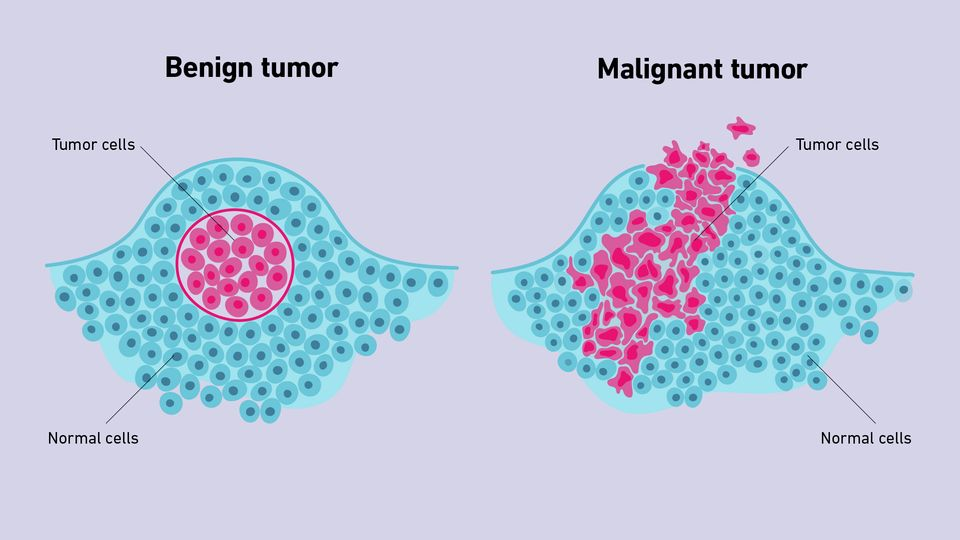</center>
</div>

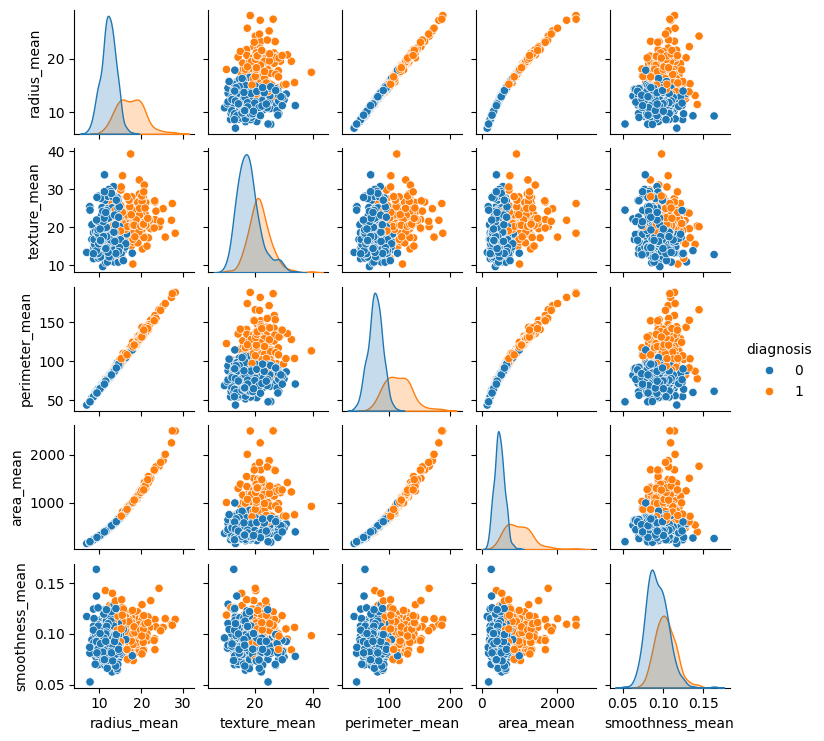

In [12]:
cols = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']
sns.pairplot(data=dataset, vars=cols, hue='diagnosis', height=1.5)

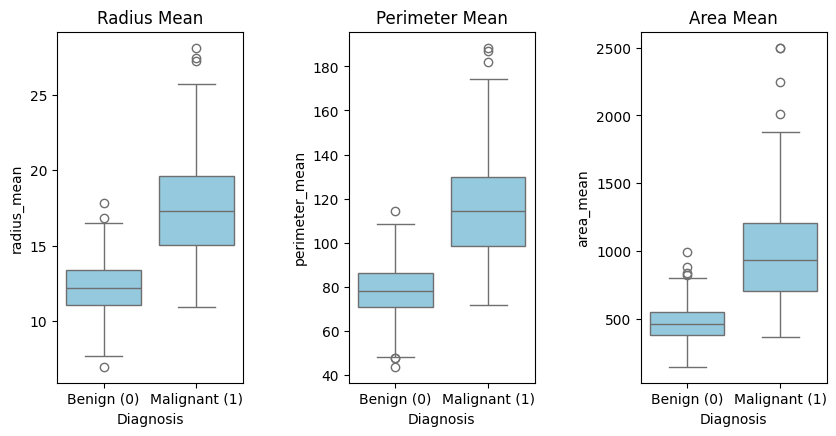

In [13]:
viz_features = ['radius_mean','perimeter_mean','area_mean']  
plt.figure(figsize=(3*len(viz_features),5))
for i, feature in enumerate(viz_features, start=1):
    ax = plt.subplot(1, len(viz_features), i)
    sns.boxplot(data=dataset, x='diagnosis', y=feature, order=[0,1], color='skyblue', ax=ax)
    ax.set_xticklabels(['Benign (0)', 'Malignant (1)'])
    ax.set_xlabel('Diagnosis')
    ax.set_title(feature.replace('_',' ').title())
plt.tight_layout(pad=3.0)
plt.show()

Malignant tumors have larger values for mean perimeters, mean radius, and mean area. While benign tumors tend to be smaller and regular in shape.

## Comparison

<div>
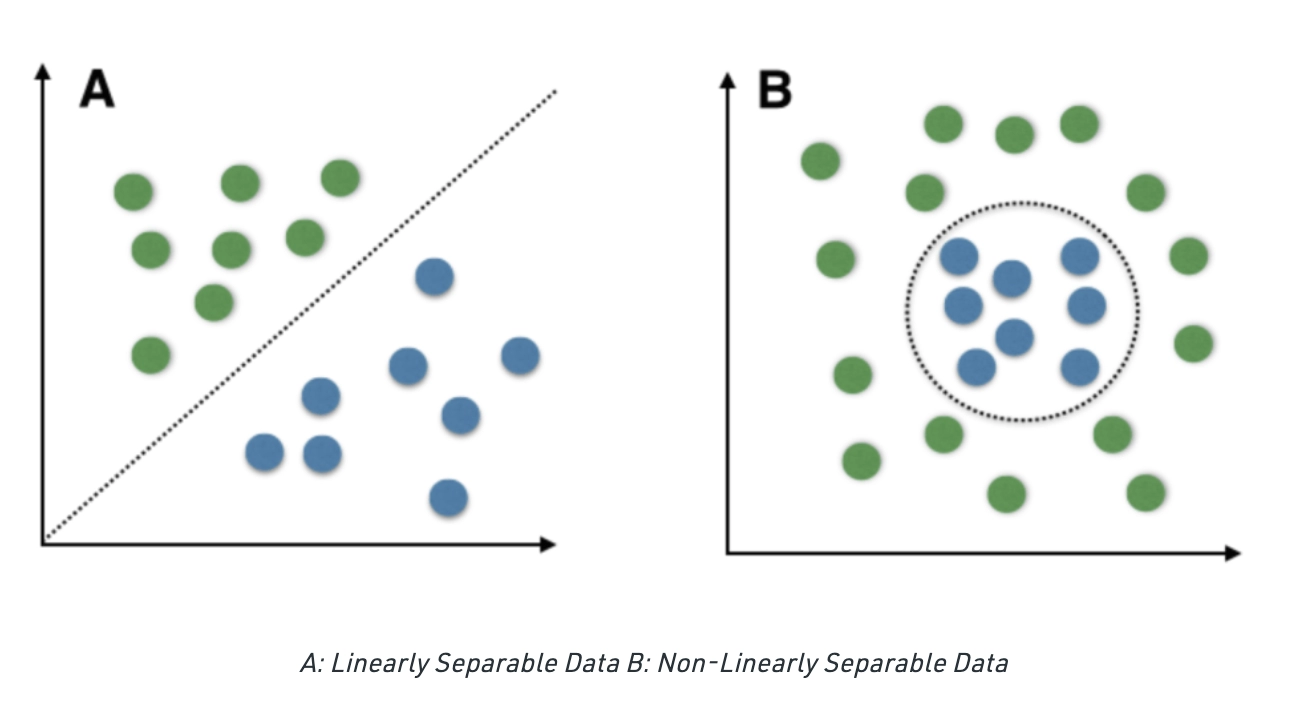

Our dataset from the pairplot is not linearly separable. My prediction is that a simple  model like the single perceptron learning algorithm might not be sufficient to achieve high accuracy in our binary classification task. 

In [14]:
dataset.corr().head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


<Axes: >

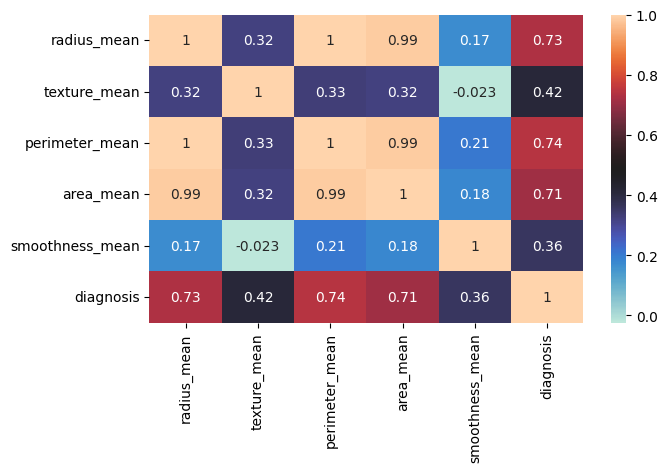

In [15]:
cols = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','diagnosis']
corr = dataset[cols].corr()
plt.figure(figsize=(7,4))
sns.heatmap(corr,annot=True, cmap="icefire")

Mean radius, mean perimeter, and mean area have strong negative correlations with diagnosis. This indicates that as these features increase, the likelihood of the tumor being malignant (0) increases. (Larger tumors are more likely to be malignant)

## Split the Data

In [16]:
# Splitting the data and obtaining 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Show dimensions
print(f"X_train shape: { X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (455, 30), y_train shape: (455,)
X_test shape: (114, 30), y_test shape: (114,)


In [18]:
# Scaling our data is a must for SMOTE pick k-nearest minority neighbors using Euclidian distance
scaler = StandardScaler().fit(X_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

In [19]:
smote=SMOTE(sampling_strategy='minority', random_state=42) 
X_train_resampled, y_train_resampled=smote.fit_resample(X_train_standard,y_train)
y_train_resampled.value_counts()

diagnosis
1    285
0    285
Name: count, dtype: int64

## Feature Scaling
An important process in machine learning of normalizing the range of independent variables or features of data in a fixed range. 

Standardizing: Transforming data to have a mean of 0 and a standard deviation of 1.

EDIT: We will not do feature scaling before cross validation because the scaler would "see" the validation fold when computing mean/std. So there will be no leakage and not over optimistic.

## Closer look of our scatterplot

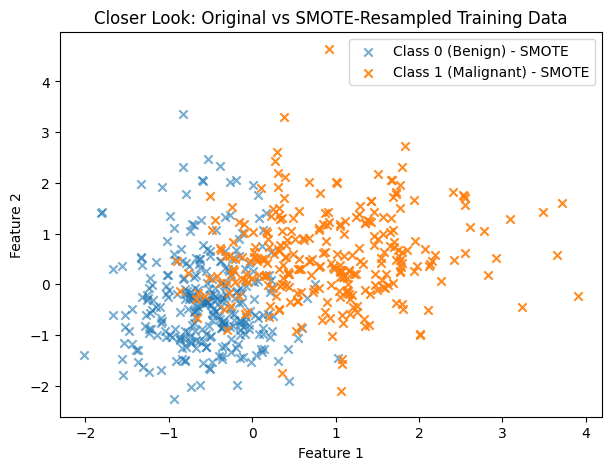

In [20]:
# Convert to NumPy for easy boolean indexing
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_train_smote_np = np.asarray(X_train_resampled, dtype=np.float64) # or just X_train_resampled
y_train_smote_np = np.asarray(y_train_resampled, dtype=np.int32)

plt.figure(figsize=(7,5))

# SMOTE‑resampled training data
plt.scatter(X_train_smote_np[y_train_smote_np == 0, 0], X_train_smote_np[y_train_smote_np == 0, 1],
            label='Class 0 (Benign) - SMOTE', alpha=0.6, marker='x')
plt.scatter(X_train_smote_np[y_train_smote_np == 1, 0], X_train_smote_np[y_train_smote_np == 1, 1],
            label='Class 1 (Malignant) - SMOTE', alpha=0.9, marker='x')

plt.title('Closer Look: Original vs SMOTE‑Resampled Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

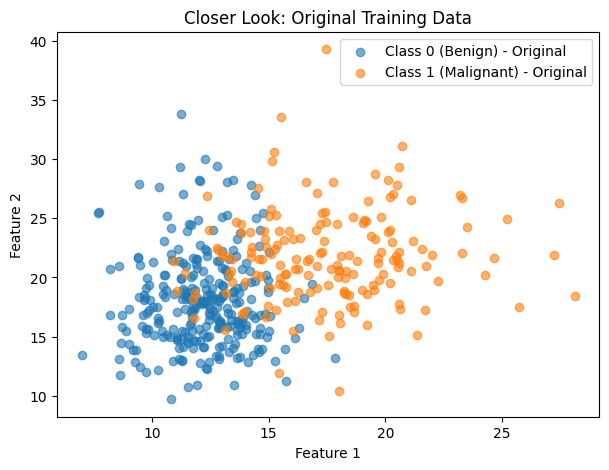

In [21]:
plt.figure(figsize=(7,5))

# Original training data
plt.scatter(X_train_np[y_train_np == 0, 0], X_train_np[y_train_np == 0, 1],
            label='Class 0 (Benign) - Original', alpha=0.6, marker='o')
plt.scatter(X_train_np[y_train_np == 1, 0], X_train_np[y_train_np == 1, 1],
            label='Class 1 (Malignant) - Original', alpha=0.6, marker='o')

plt.title('Closer Look: Original Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Many data points are overlapping in the middle that most likely means there will be many missclassifications. 

<Axes: xlabel='perimeter_mean', ylabel='texture_mean'>

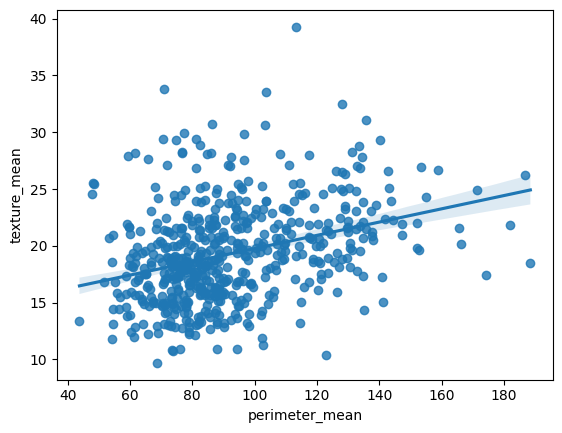

In [22]:
sns.regplot(x='perimeter_mean', y='texture_mean', data=dataset)

In [23]:
print("first cols:", list(dataset.columns)[:10])

first cols: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']


In [ ]:
# 0) paths
Path("data/processed").mkdir(parents=True, exist_ok=True)

# 1) load + make target numeric
df = pd.read_csv("data/data.csv")
df["diagnosis"] = df["diagnosis"].replace({"B": 0, "M": 1}).astype("int8")

# 2) keep ALL features except id/Unnamed and target
feat_cols = [c for c in df.columns if c not in ("id", "Unnamed: 32", "diagnosis")]
X, y = df[feat_cols], df["diagnosis"]

# 3) stratified split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4) save
X_tr.assign(diagnosis=y_tr.values).to_csv("data/processed/train.csv", index=False)
X_te.assign(diagnosis=y_te.values).to_csv("data/processed/test.csv", index=False)
print("Saved train/test to data/processed/")

# save a SMOTE-resampled training set
X_res, y_res = SMOTE(random_state=42).fit_resample(X_tr, y_tr)
pd.DataFrame(X_res, columns=feat_cols).assign(diagnosis=y_res).to_csv(
     "data/processed/train_resampled.csv", index=False
 )

Saved train/test to data/processed/
